In [1]:
#importamos librerias 

import pandas as pd
import numpy as np

In [2]:
import sklearn
from sklearn.metrics import confusion_matrix

### Abrir base de datos 

In [3]:
# Leer csv
datos = pd.read_excel("prueba_pgu.xlsx", keep_default_na=False, sheet_name ='dat', na_values=[""])

# Ver primeras filas 
datos.head()

,RUN,NOMBRE,BANCO,MES,FPAGO,LUGAR_PAGO,COMUNA,C_COMUNA,REGION,C_REGION,...,RANGO_EDAD,SEXO,ECIVIL,NACIONALIDAD,FEC_DEF,FALLECIDO,PREDICCION,REAL,EMAIL,SMS
0,4576567,REUQUE LLANCAMAN CLAUDINA,CCAF LOS HEROES,ABRIL,RURAL,TALAMI (ALHUE),ALHUE,13502,METROPOLITANA,13,...,5,F,SOLTERO,C,NaT,NO,1,0,SI,SI
1,4798932,AROSTICA CORTES EVA DEL CARMEN,CCAF LOS HEROES,ABRIL,RURAL,LOS LOROS,TIERRA AMARILLA,3103,ATACAMA,3,...,5,F,SOLTERO,C,NaT,NO,0,0,NO,NO
2,6762746,GONZALEZ VARAS ROSA MARGARITA,CCAF LOS HEROES,ABRIL,RURAL,LOS LOROS,TIERRA AMARILLA,3103,ATACAMA,3,...,2,F,CASADO,C,NaT,NO,1,0,NO,NO
3,4581981,AVALOS LEYTON LUISA ELENA,CCAF LOS HEROES,ABRIL,RURAL,CALINGASTA,VICUÑA,4106,COQUIMBO,4,...,4,F,DIVORCIADO,C,NaT,NO,0,0,NO,NO
4,7247445,ARAYA MUNOZ PABLA,BANCO ESTADO,ABRIL,SUCURSAL BECH,COMBARBALA,COMBARBALA,4302,COQUIMBO,4,...,2,F,CASADO,C,NaT,NO,1,1,NO,NO


In [4]:
# Ordenar las columnas 
cols = ['PREDICCION', 'REAL', 'RUN', 'SEXO']
df = datos[cols]
df

,PREDICCION,REAL,RUN,SEXO
0,1,0,4576567,F
1,0,0,4798932,F
2,1,0,6762746,F
3,0,0,4581981,F
4,1,1,7247445,F
...,...,...,...,...
5931,1,0,8354679,F
5932,1,0,7477453,M
5933,1,0,9245825,F
5934,1,0,8098869,M


In [7]:
#v Separar variables base de datos
# Hombres 
df_hombres = df[df['SEXO'] == "M"]
df_hombres

,PREDICCION,REAL,RUN,SEXO
13,1,1,4382029,M
19,0,0,6141515,M
22,1,1,6397205,M
23,0,0,6459485,M
24,0,1,6389883,M
...,...,...,...,...
5925,1,0,7732041,M
5926,1,0,7476141,M
5932,1,0,7477453,M
5934,1,0,8098869,M


In [5]:
# Mujeres 
df_mujeres = df[df['SEXO'] == "F"]
df_mujeres

,PREDICCION,REAL,RUN,SEXO
0,1,0,4576567,F
1,0,0,4798932,F
2,1,0,6762746,F
3,0,0,4581981,F
4,1,1,7247445,F
...,...,...,...,...
5928,1,1,4971229,F
5929,1,0,5775935,F
5930,1,0,6650989,F
5931,1,0,8354679,F


In [8]:
#Matriz de confusión de hombres
matriz_1 = sklearn.metrics.confusion_matrix(df_hombres['REAL'], df_hombres['PREDICCION'])
matriz_1

array([[335, 606],
       [155, 688]])

In [9]:
#Matriz de confusión de mujeres 
matriz_2 = sklearn.metrics.confusion_matrix(df_mujeres['REAL'], df_mujeres['PREDICCION'])
matriz_2

array([[ 969, 1368],
       [ 354, 1461]])

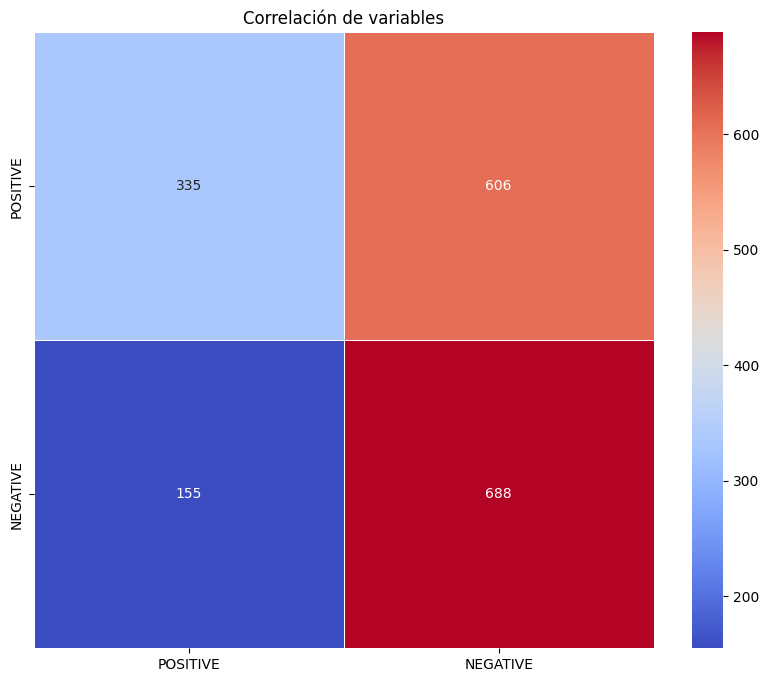

In [38]:
# Vamos a realizar la gráfica más bella
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(matriz_1,
            xticklabels=["POSITIVE", "NEGATIVE"],
            yticklabels=["POSITIVE", "NEGATIVE"],
            cmap='coolwarm',  # Elige el mapa de colores que prefieras
            annot=True,  # Muestra los valores de correlación}
            linewidths=.5,
            fmt='g')  # Ajusta el espaciado entre las celdas si es necesario
plt.title("Correlación de variables")

plt.show()

In [10]:
#Obtener TP, TN, FP, FN hombres 
tn1, fp1, fn1, tp1 = matriz_1.ravel()

In [11]:
#Obtener TP, TN, FP, FN mujeres  
tn2, fp2, fn2, tp2 = matriz_2.ravel()

### Métricas de medición de sesgos 

In [12]:
#False positive rate
#Hombres
fpr_1 = fp1/(fp1+tn1)

#Mujeres 
fpr_2 =fp2/(fp2+tn2)

In [13]:
#False negative rate 
#Hombres 
fnr_1 = fn1/(tp1+fn1)

#Mujeres 
fnr_2 = fn2/(tp2+fn2)

In [14]:
#False omission rate 
#Hombres 
fomr_1 = fn1/(tn1+fn1)

#Mujeres 
fomr_2 = fn2/(tn2+fn2)

In [15]:
#False discovery rate
#Hombres
fdr_1 = fp1/(tp1+fp1)

#Mujeres
fdr_2 = fp2/(tp2+fp2)

In [16]:
#Tabla métricas 
#resumir datos
metricas = {'False positive rate': [fpr_1, fpr_2], 
            'False negative rate':[fnr_1, fnr_2],
            'False omission rate':[fomr_1, fomr_2], 
            'False discovery rate':[fdr_1, fdr_2]}

#crear dataframe
df_metricas = pd.DataFrame(metricas)
df_metricas.index = ['Hombres', 'Mujeres']
df_metricas

,False positive rate,False negative rate,False omission rate,False discovery rate
Hombres,0.643996,0.183867,0.316327,0.468315
Mujeres,0.585366,0.195041,0.267574,0.483563


### Comparaciones e interpretación

In [17]:
#Significa que la proporción de falsos positivos entre hombres es aproximadamente un 10% mayor
#que la proporción de falsos positivos entre mujeres.
#Interpretando esto, puedes decir que, en relación con las mujeres, los hombres tienen una tasa 
#ligeramente más alta de falsos positivos. Esto implica que en el contexto de tu análisis, 
#hay una mayor proporción de casos donde la prueba o el modelo indica incorrectamente la presencia
#de la condición o la variable de interés en hombres en comparación con mujeres.
fpr_1/fpr_2

1.1001594048884167

In [18]:
#significa que la proporción de falsos negativos entre hombres es aproximadamente el 90% de la proporción 
#de falsos negativos entre mujeres.
#Interpretando esto, puedes decir que, en relación con las mujeres, los hombres tienen una tasa ligeramente 
#más baja de falsos negativos. Específicamente, en el contexto en el que estás trabajando, los hombres tienen 
#menos casos donde la prueba o el modelo fallan en identificar correctamente la condición o la variable de 
#interés en comparación con las mujeres.
fnr_1/fnr_2

0.9427086474857752

In [19]:
#significa que la proporción de falsas omisiones entre hombres es aproximadamente un 18% mayor que
#la proporción de falsas omisiones entre mujeres.
#Esto implica que en el contexto de tu análisis, hay una mayor proporción de casos donde 
#la prueba o el modelo no indica la presencia de la condición o la variable de interés 
#en hombres en comparación con mujeres, cuando en realidad debería haber sido detectada.
fomr_1/fomr_2

1.1822033898305084

In [20]:
#significa que la proporción de falsos descubrimientos entre hombres es aproximadamente un 4% 
#menor que la proporción de falsos descubrimientos entre mujeres.
#Esto implica que en el contexto de tu análisis, hay una menor proporción de casos donde se 
#hace un descubrimiento erróneo (por ejemplo, una asociación entre variables) en hombres en 
#comparación con mujeres.
fdr_1/fdr_2

0.9684678272187425

### Umbral

In [21]:
#Umbral de decision
umbral = 0.1 #90%

In [22]:
#Comparación False Positive Rate
fair_fpr = False

if ((1-umbral)<=(fpr_2/fpr_1)<=(1/(1-umbral))):
    fair_fpr = True

In [23]:
#Comparación False Negative Rate
fair_fnr = False

if ((1-umbral)<=(fnr_2/fnr_1)<=(1/(1-umbral))):
    fair_fnr = True

In [24]:
#Comparación False Omission Rate
fair_fomr = False

if ((1-umbral)<=(fomr_2/fomr_1)<=(1/(1-umbral))):
    fair_fomr = True

In [25]:
#Comparación False Discovery Rate
fair_fdr = False

if ((1-umbral)<=(fdr_2/fdr_1)<=(1/(1-umbral))):
    fair_fdr = True

In [26]:
#Resumen disparidades 
#resumir datos
disparidades = {'False positive rate': ['REF', fair_fpr], 
                'False negative rate':['REF', fair_fnr],
                'False omission rate':['REF', fair_fomr], 
                'False discovery rate':['REF', fair_fdr]}

#crear dataframe
df_disparidades = pd.DataFrame(disparidades)
df_disparidades.index = ['Hombres', 'Mujeres']
df_disparidades

,False positive rate,False negative rate,False omission rate,False discovery rate
Hombres,REF,REF,REF,REF
Mujeres,True,True,False,True


In [27]:
#Resumen comparación 
#resumir datos
comparacion = {'False positive rate': ['REF', fpr_2/fpr_1], 
               'False negative rate':['REF', fnr_2/fnr_1],
               'False omission rate':['REF', fomr_2/fomr_1], 
               'False discovery rate':['REF', fdr_2/fdr_1]}

#crear dataframe
df_comparacion = pd.DataFrame(comparacion)
df_comparacion.index = ['Hombres', 'Mujeres']
df_comparacion

,False positive rate,False negative rate,False omission rate,False discovery rate
Hombres,REF,REF,REF,REF
Mujeres,0.908959,1.060773,0.845878,1.032559
